# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
df = pd.read_csv('../data/boston_data.csv')

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [4]:
df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


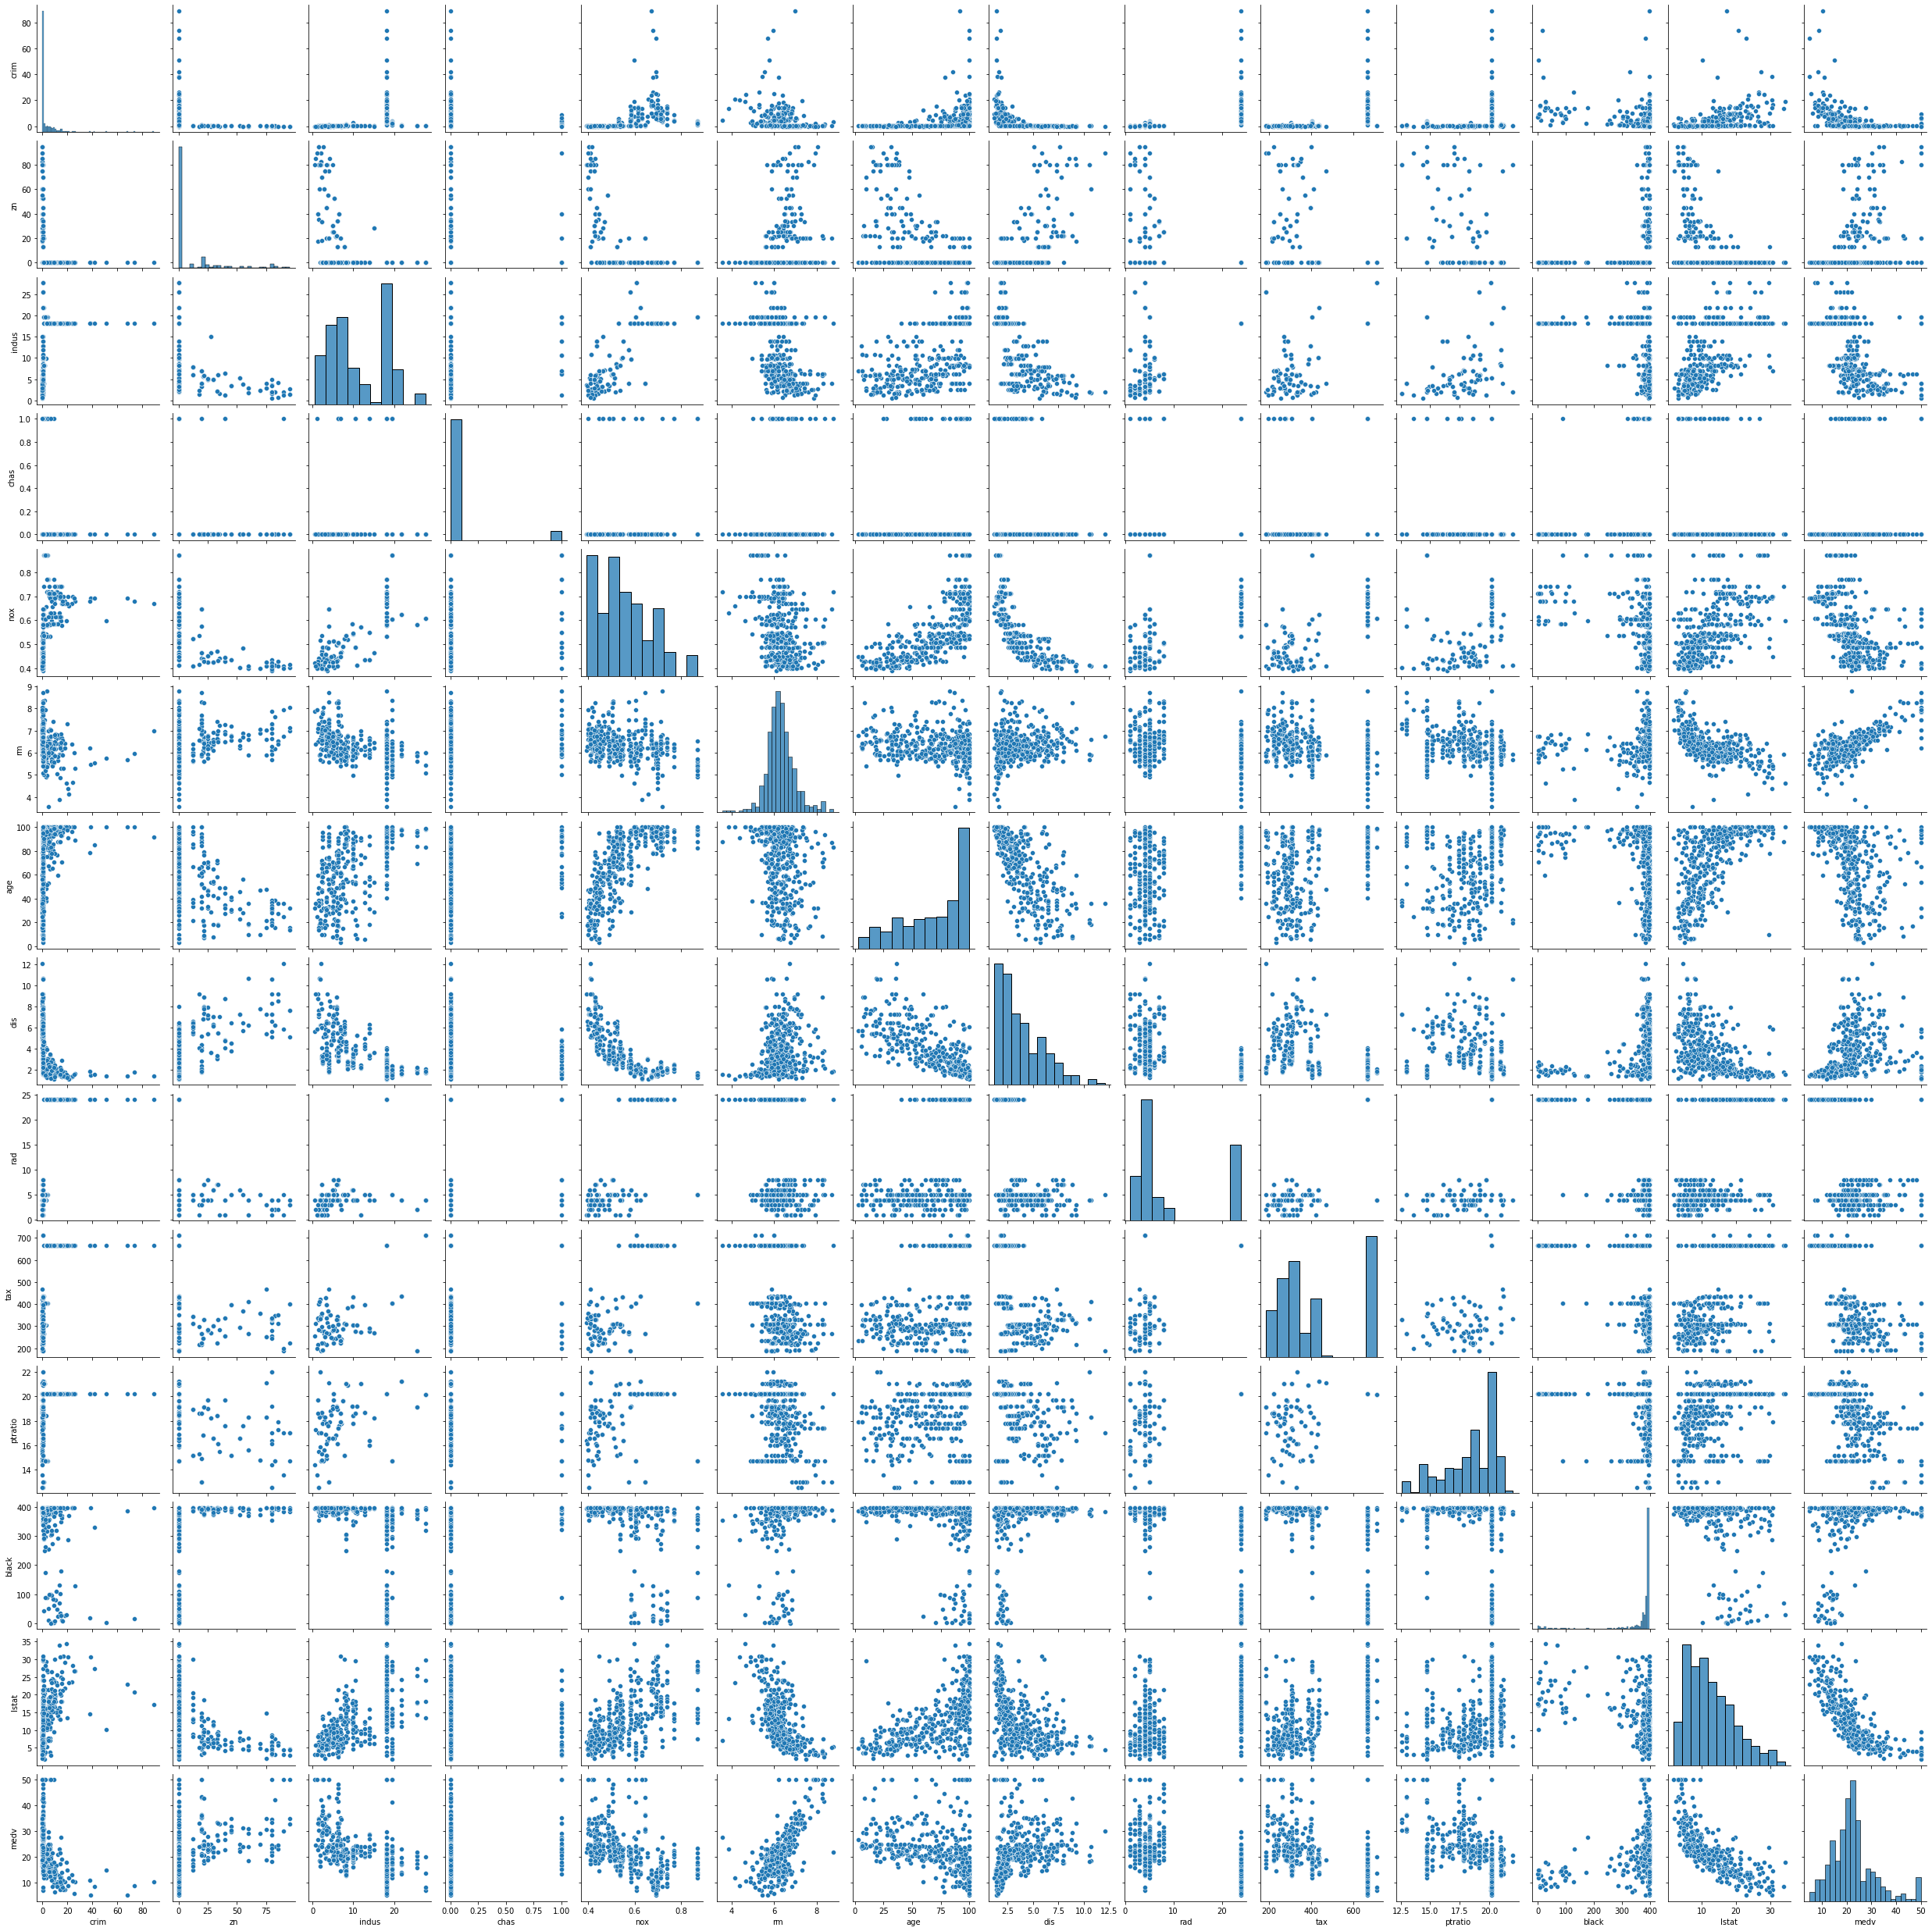

In [5]:
sns.pairplot(df)

<AxesSubplot:>

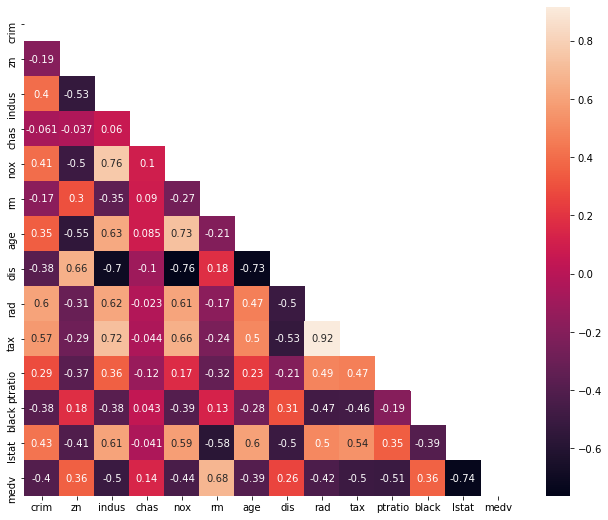

In [6]:
plt.figure(figsize=(11, 9))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

In [7]:
'''
most correlation:
rm and lstat
'''

'\nmost correlation:\nrm and lstat\n'

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [8]:
'''
positive relationship between rm and house prices
negative relationship between lstat and house prices
'''

'\npositive relationship between rm and house prices\nnegative relationship between lstat and house prices\n'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [9]:
'''
Not really. Could consider indus, tax and ptratio as they have a correlation of around 0.50
'''

'\nNot really. Could consider indus, tax and ptratio as they have a correlation of around 0.50\n'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [10]:
df.describe()['medv']

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [11]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [12]:
from sklearn.model_selection import train_test_split

X = df[['rm', 'lstat']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) 

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
max_depth = [2, 4, 6, 8, 10]
r2_train = [] 
r2_test = []

for i in max_depth:
    model1 = RandomForestRegressor(max_depth=i)
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_train)
    y_test_pred = model1.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print('For k =', i,':', '\nR2 score for the training set:', 
          round(r2_score(y_train, y_pred), 3) , 
          '\nR2 score for the test set:', round(r2_score(y_test, y_test_pred), 3))

For k = 2 : 
R2 score for the training set: 0.757 
R2 score for the test set: 0.685
For k = 4 : 
R2 score for the training set: 0.854 
R2 score for the test set: 0.723
For k = 6 : 
R2 score for the training set: 0.914 
R2 score for the test set: 0.72
For k = 8 : 
R2 score for the training set: 0.943 
R2 score for the test set: 0.714
For k = 10 : 
R2 score for the training set: 0.954 
R2 score for the test set: 0.699


Now, plot the score for each tree on the training set and on the testing set.

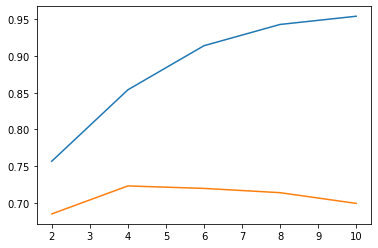

In [16]:
plt.plot(max_depth, r2_train)
plt.plot(max_depth, r2_test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
'''
not a distinct line, there is better performance between 6-8 but the curve is very flat.
'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
k = [1, 10]

for i in k:
    model2 = RandomForestRegressor(max_depth=i)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_train)
    y_test_pred = model2.predict(X_test)
    r2_train.append(r2_score(y_train, y_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    print('For k =', i,':', '\nR2 score for the training set:', 
          round(r2_score(y_train, y_pred), 3) , 
          '\nR2 score for the test set:', round(r2_score(y_test, y_test_pred), 3))

In [ ]:
#the first score has very low R2 scores, high variance in both cases - much better score for k = 10 but still high bias
#because it doesnt explain the test set as well as the training set

In [ ]:
'''
from mlxtend.evaluate import bias_variance_decomp

X_train, X_test = X.iloc[:325], X.iloc[326:]

y_train, y_test = y.iloc[:325], y.iloc[326:]

test = RandomForestRegressor(max_depth=10)

mse, bias, var = bias_variance_decomp(test, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
'''

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
#the best would be around k = 7 as the R2 score is high and the R2 score on the testing set is
#the highest in these cases -> the lowest the better as simple model is more applicable on real world data

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
'''
- The data will not be very relevant today as markets have changed. Different demands, different values, inflation, etc.
- In this data set there are not very many correlations higher than 0.5 -> maybe need better explanatory variables
- The model can make fairly good predictions and could give an indicator in around what range the price should be, but it cannot
give a prediction of an exact price
- No, as the demands in a city vs a rural area are very different'''